***Features and their description***
1. Pregnancies - Number of times the person conceived
2. Fasting Glucose - 8 hrs of fasting
3. Age - In years, 1 - 85
4. BMI - weight in kg  / Height in meters^2
5. Family History - 0 for no Family history in diabetes, 1 if there is family history
6. Waist to hip ratio = Waist / Hips in cm
7. Bloodpressure - Diastolic blood pressure (mm Hg)
8. Outcome - 0 for not diabetic and 1 if diabetic (Target Variable)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler


In [3]:
df = pd.read_csv(r"C:\Users\Hazel\Downloads\DiabetesDatasets\diabetes.csv")


***Correlation***

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

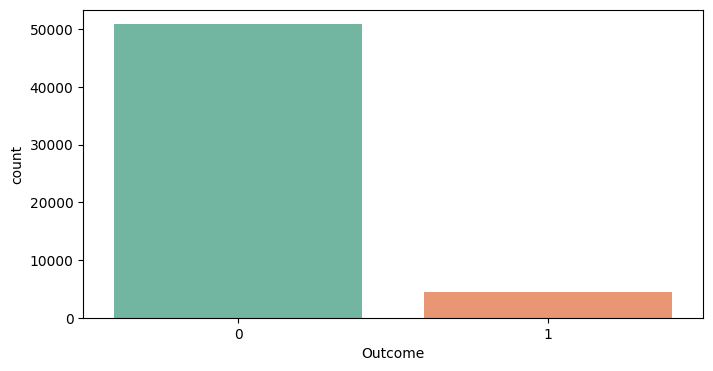

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=df, palette='Set2', hue=None, legend=False)
plt.show()
#This graph shows the distribution of the people with diabetes versus those who are healthy

***Splitting the data frame into X and Y***

In [6]:
target_name ='Outcome'
Y = df[target_name]
X = df.drop(target_name, axis=1)

Since the data size has unbalanced distribution on the target variable (diabetic vs not diabetic) it may lead to a biased model predictions favoring the majority class. By doing undersampling, it helps the model perform better which will improve predicting accuracy for the minority.

In [7]:
undersampler = RandomUnderSampler(random_state=7)  # Initialize undersampler
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)  # Apply undersampling
print("Class distribution after undersampling:", pd.Series(Y_resampled).value_counts())  

Class distribution after undersampling: 0    4463
1    4463
Name: Outcome, dtype: int64


In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,WaistToHipRatio,FamilyHistory,Age
0,0,78,63.0,14.90,0.80,0,2
1,0,84,64.0,17.63,0.76,0,10
2,0,76,80.0,22.56,0.76,0,19
3,3,85,82.0,29.39,0.91,0,59
4,0,71,60.0,18.48,0.82,0,11


In [9]:
Y.tail()

55294    0
55295    1
55296    1
55297    1
55298    0
Name: Outcome, dtype: int64

***To Prevent Data Leakage, Perform train-test split Before Scaling***<br>
<i>Why Scale After Train-Test Split?<br></i>
<b>Without Leakage:</b> Scaling involves adjusting feature values to a standard range (e.g., mean 0, standard deviation 1 for StandardScaler).<br>
If you scale before splitting, the scaler will "see" information from both the training and test sets.<br>
This means the scaler’s parameters (mean, standard deviation) are influenced by the entire dataset, <br>
including data that the model should not have access to during training.<br>
<b>With Leakage:</b> When you split the data first, the scaler only learns the parameters (mean, standard deviation) from the training set.<br>
Then, the test data is scaled with these parameters, ensuring that the test data remains unseen during training, <br>
preserving its role as unseen data for evaluating model performance.<br>
<b>Conclusion</b><br>
Scaling after splitting prevents data leakage and ensures a fair evaluation.<br>
It avoids contaminating the training process with information from the test set,<br>
resulting in a model that performs well on genuinely unseen data and is more likely to generalize effectively in real-world applications.

In [10]:
#performing tran-test split 
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=7)


***Then initialize and fit scaler on the training set ONLY to avoid leakage for Log Reg, KNN and SVM only***

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)    

In [12]:
X_train.shape,Y_train.shape
X_test.shape,Y_test.shape

((1786, 7), (1786,))

***Building classification algorithms and Predictions***

<b>Using unscaled data for Decision Tree and Random Forest, which do not require scaling</b>

***Decision Tree*** <br>


In [13]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

**Random Forest**

In [14]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

***Using scaled data for modals that are sensitive to scaling***

***Logistic Regression***

In [15]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train_scaled, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

***KNN***

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

***Naive Bayes Classifier***

In [17]:
nb = GaussianNB()
nb.fit(X_train_scaled, Y_train)

GaussianNB()

***Support Vector Machine***

In [18]:
sv = SVC(probability=True)
sv.fit(X_train_scaled, Y_train)

SVC(probability=True)

***Model Evaluation***

Results of scaled data for sensitive algorithms:

In [19]:
# Logistic Regression
print("Training Accuracy of Logistic Regression:", lr.score(X_train_scaled, Y_train) * 100)
print("Accuracy (Test) score of Logistic Regression:", lr.score(X_test_scaled, Y_test) * 100)
lr_pred = lr.predict(X_test_scaled)
print("Accuracy score of Logistic Regression:", accuracy_score(Y_test, lr_pred) * 100)

Training Accuracy of Logistic Regression: 95.30812324929971
Accuracy (Test) score of Logistic Regression: 95.07278835386337
Accuracy score of Logistic Regression: 95.07278835386337


In [20]:
print("Training Accuracy of KNN:", knn.score(X_train_scaled, Y_train) * 100)
print("Accuracy (Test) score of KNN:", knn.score(X_test_scaled, Y_test) * 100)
knn_pred = knn.predict(X_test_scaled)
print("Accuracy score of KNN:", accuracy_score(Y_test, knn_pred) * 100)
#KNN and Logistic Regression were highlighted because they are sensitive to scaling, so accuracy scores for these models after scaling are often shown as examples.

Training Accuracy of KNN: 95.63025210084034
Accuracy (Test) score of KNN: 94.00895856662935
Accuracy score of KNN: 94.00895856662935


In [21]:
# Naive Bayes
print("Training Accuracy of Naive Bayes:", nb.score(X_train_scaled, Y_train) * 100)
print("Accuracy (Test) score of Naive Bayes:", nb.score(X_test_scaled, Y_test) * 100)
nb_pred = nb.predict(X_test_scaled)
print("Accuracy score of Naive Bayes:", accuracy_score(Y_test, nb_pred) * 100)

Training Accuracy of Naive Bayes: 87.91316526610645
Accuracy (Test) score of Naive Bayes: 87.73796192609183
Accuracy score of Naive Bayes: 87.73796192609183


In [22]:
# SVM
print("Training Accuracy of SVM:", sv.score(X_train_scaled, Y_train) * 100)
print("Accuracy (Test) score of SVM:", sv.score(X_test_scaled, Y_test) * 100)
sv_pred = sv.predict(X_test_scaled)
print("Accuracy score of SVM:", accuracy_score(Y_test, sv_pred) * 100)

Training Accuracy of SVM: 95.92436974789916
Accuracy (Test) score of SVM: 95.18477043673013
Accuracy score of SVM: 95.18477043673013


Results for algorithms that do not require scaling:

In [23]:
# Decision Tree (using unscaled data)
print("Training Accuracy of Decision Tree:", dt.score(X_train, Y_train) * 100)
print("Accuracy (Test) score of Decision Tree:", dt.score(X_test, Y_test) * 100)
dt_pred = dt.predict(X_test)
print("Accuracy score of Decision Tree:", accuracy_score(Y_test, dt_pred) * 100)

Training Accuracy of Decision Tree: 100.0
Accuracy (Test) score of Decision Tree: 93.33706606942889
Accuracy score of Decision Tree: 93.33706606942889


In [24]:
# Random Forest (using unscaled data)
print("Training Accuracy of Random Forest:", rf.score(X_train, Y_train) * 100)
print("Accuracy (Test) score of Random Forest:", rf.score(X_test, Y_test) * 100)
rf_pred = rf.predict(X_test)
print("Accuracy score of Random Forest:", accuracy_score(Y_test, rf_pred) * 100)


Training Accuracy of Random Forest: 99.9859943977591
Accuracy (Test) score of Random Forest: 95.91265397536394
Accuracy score of Random Forest: 95.91265397536394


<b>Insight on the Classification Report </b></br>
<b>Precision:</b> 0 indicated that out of all predicted non-diabetic, 95% were correctly predicted, and 96% for diabetics</br>
<b>Recall:</b> 0 means that out of all the actual non-diabetic cases, 96% were correctly identified while 1 95% were correctly identified</br>
<b>F1 -Score</b> - 0 -96% represents the balance between precision and recall for diabetic cases</br>
The F1 Score indicates that the model is performing well in checking between diabetic or not </br>
Accuracy for F1 Score is 96% </br>
<b>For the Confusion Matrix</b></br>
TN 859 correctly predicted 859 non diabetic cases</br>
FP 35 model incorrectly predicted 35 cases as diabetic </br>  
FN 41 - model incorrectly predicted 41 cases as non diabetic when they were actually diabetic</br>
TP 851 - number of correctly predicted diabetic cases


In [25]:
print("\nClassification Report:\n", classification_report(Y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, rf_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       894
           1       0.96      0.96      0.96       892

    accuracy                           0.96      1786
   macro avg       0.96      0.96      0.96      1786
weighted avg       0.96      0.96      0.96      1786


Confusion Matrix:
 [[860  34]
 [ 39 853]]


In [26]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, rf_pred)

# Print each element of the confusion matrix
print('TN - True Negative: {}'.format(cm[0, 0]))
print('FP - False Positive: {}'.format(cm[0, 1]))
print('FN - False Negative: {}'.format(cm[1, 0]))
print('TP - True Positive: {}'.format(cm[1, 1]))

# Calculate and print the accuracy rate
accuracy_rate = (cm[0, 0] + cm[1, 1]) / np.sum(cm) * 100
print('Accuracy Rate: {:.2f}%'.format(accuracy_rate))
#Accuracy Rate computation= 851+859 / 1780 * 100 = 1710/1786*100=95.74%


TN - True Negative: 860
FP - False Positive: 34
FN - False Negative: 39
TP - True Positive: 853
Accuracy Rate: 95.91%


In [27]:
# Random Forest results
#Since the Random forest results are 100% for training accuracy and 95.74% for test accuracy, there is likely overfitting, however this may still be the 
#best model to use due to the accuracy Rate difference from all the models
# new_data = [[0, 78, 63, 14.9, 0.8, 0, 2]] 
new_data = [[0, 130, 68, 31.53, 1.04, 0, 54]] 
prediction = rf.predict(new_data)  # Predict outcome on unscaled data
prediction_proba = rf.predict_proba(new_data)  # Get probabilities for each class
if prediction[0] == 1:
    print("The result is 1: You are likely diabetic. Please consult a doctor.")
    print("Probability of being diabetic, please change lifestyle or change diet : {:.2f}%".format(prediction_proba[0][1] * 100))
else:
    print("The result is 0: You are not likely diabetic.")
    print("Probability of not being diabetic: {:.2f}%".format(prediction_proba[0][0] * 100))


The result is 1: You are likely diabetic. Please consult a doctor.
Probability of being diabetic, please change lifestyle or change diet : 100.00%


In [28]:
#SVM second choice model result to avoid potential overfitting
new_data = [[0, 78, 63, 14.9, 0.8, 0, 2]] 
new_data_scaled = scaler.transform(new_data)  # Scale the new data

# Predict outcome and probability using SVM
prediction = sv.predict(new_data_scaled)  # Predict outcome on scaled data
prediction_proba = sv.predict_proba(new_data_scaled)  # Get probabilities for each class

# Print the prediction with probability
if prediction[0] == 1:
    print("The result is 1: You are likely diabetic. Please consult a doctor.")
    print("Probability of being diabetic: {:.2f}%".format(prediction_proba[0][1] * 100))
else:
    print("The result is 0: You are not likely diabetic.")
    print("Probability of not being diabetic: {:.2f}%".format(prediction_proba[0][0] * 100))


The result is 0: You are not likely diabetic.
Probability of not being diabetic: 97.97%
